In [1]:
import pandas as pd

TARGET='nr-of-gadgets' # 'binary-size'

df = pd.read_csv('splc21-data - 100-configurations.csv')
df.head()



,--disable-avs,--disable-swscale,--disable-lavf,--disable-ffms,--disable-gpac,--disable-lsmash,--enable-lto,--enable-debug,--enable-gprof,--enable-strip,...,--bit-depth=10,--bit-depth=all,--chroma-format=400,--chroma-format=420,--chroma-format=422,--chroma-format=444,--chroma-format=all,binary-size,unit,nr-of-gadgets
0,False,False,False,False,True,False,True,False,True,False,...,True,False,False,True,False,False,False,3096112,bytes,106878
1,True,True,True,True,True,False,False,False,False,True,...,False,False,True,False,False,False,False,1704056,bytes,62065
2,False,True,True,True,False,False,False,True,True,False,...,False,False,False,False,True,False,False,3096112,bytes,106878
3,True,False,True,False,False,False,False,False,False,False,...,True,False,False,True,False,False,False,1718552,bytes,58537
4,True,False,False,False,False,True,False,True,True,False,...,False,False,False,False,False,False,False,3096112,bytes,106878


In [2]:
df.columns

Index(['--disable-avs', '--disable-swscale', '--disable-lavf',
       '--disable-ffms', '--disable-gpac', '--disable-lsmash', '--enable-lto',
       '--enable-debug', '--enable-gprof', '--enable-strip', '--enable-pic',
       '--disable-asm', '--enable-shared', '--enable-static',
       '--enable-bashcompletion', '--disable-cli', '--disable-bashcompletion',
       '--disable-opencl', '--disable-gpl', '--disable-thread',
       '--disable-win32thread', '--disable-interlaced', '--system-libx264',
       '--bit-depth=8', '--bit-depth=10', '--bit-depth=all',
       '--chroma-format=400', '--chroma-format=420', '--chroma-format=422',
       '--chroma-format=444', '--chroma-format=all', 'binary-size', 'unit',
       'nr-of-gadgets'],
      dtype='object')

In [3]:
df_test = pd.read_csv('splc21-data - 32-configurations.csv')
df_test.head()

,--disable-avs,--disable-swscale,--disable-lavf,--disable-ffms,--disable-gpac,--disable-lsmash,--enable-lto,--enable-debug,--enable-gprof,--enable-strip,...,--bit-depth=10,--bit-depth=all,--chroma-format=400,--chroma-format=420,--chroma-format=422,--chroma-format=444,--chroma-format=all,binary-size,unit,nr-of-gadgets
0,True,True,True,True,True,True,True,False,False,False,...,True,False,False,False,False,False,False,3096112,bytes,106878
1,True,False,False,False,False,True,False,False,True,True,...,False,True,False,False,False,False,False,2194952,bytes,76255
2,False,True,True,True,False,True,False,False,True,True,...,False,False,False,False,False,False,False,980728,bytes,31911
3,True,True,True,True,False,True,False,True,False,False,...,False,True,False,False,False,False,False,7491752,bytes,45860
4,False,True,True,True,False,False,False,True,True,True,...,False,True,False,False,False,False,False,3096112,bytes,106878


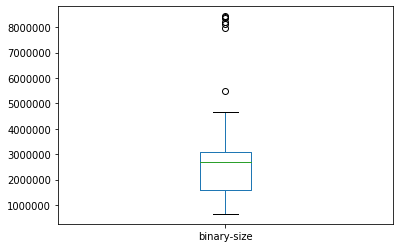

In [4]:
df['binary-size'].plot(kind='box')

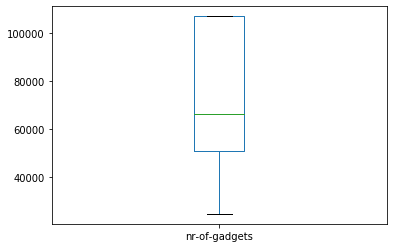

In [5]:
df['nr-of-gadgets'].plot(kind='box')

In [6]:
from sklearn import linear_model
fts = ['--disable-avs', '--disable-swscale', '--disable-lavf',
       '--disable-ffms', '--disable-gpac', '--disable-lsmash', '--enable-lto',
       '--enable-debug', '--enable-gprof', '--enable-strip', '--enable-pic',
       '--disable-asm', '--enable-shared', '--enable-static',
       '--enable-bashcompletion', '--disable-cli', '--disable-bashcompletion',
       '--disable-opencl', '--disable-gpl', '--disable-thread',
       '--disable-win32thread', '--disable-interlaced', '--system-libx264',
       '--bit-depth=8', '--bit-depth=10', '--bit-depth=all',
       '--chroma-format=400', '--chroma-format=420', '--chroma-format=422',
       '--chroma-format=444', '--chroma-format=all']
regr = linear_model.LinearRegression()
regr.fit(df[fts], df[TARGET])

LinearRegression()

In [7]:
regr

LinearRegression()

In [8]:
regr.coef_

array([ 8.07330132e+02,  5.52439488e+03, -2.30931222e+03, -2.68104008e+03,
        4.19415116e+02, -7.85841411e+03,  4.08625003e+03, -8.65953404e+02,
       -2.15497754e+01, -3.20080219e+03,  7.18129339e+02, -8.41360693e+03,
        1.09139364e-11, -3.63797881e-12,  2.47247093e+03,  3.63797881e-12,
        2.09149891e+03, -1.60935660e+03, -1.92828996e+03,  3.21960571e+03,
       -2.20198106e+03, -1.49243827e+03,  5.12840056e+04, -1.59817639e+04,
       -1.76351951e+04, -3.84445074e+03, -3.85168183e+03, -3.65349474e+03,
       -3.96837909e+03, -5.43255459e+03, -2.76101904e+02])

In [9]:
y_pred = regr.predict(df_test[fts])

Coefficients: 
 [ 8.07330132e+02  5.52439488e+03 -2.30931222e+03 -2.68104008e+03
  4.19415116e+02 -7.85841411e+03  4.08625003e+03 -8.65953404e+02
 -2.15497754e+01 -3.20080219e+03  7.18129339e+02 -8.41360693e+03
  1.09139364e-11 -3.63797881e-12  2.47247093e+03  3.63797881e-12
  2.09149891e+03 -1.60935660e+03 -1.92828996e+03  3.21960571e+03
 -2.20198106e+03 -1.49243827e+03  5.12840056e+04 -1.59817639e+04
 -1.76351951e+04 -3.84445074e+03 -3.85168183e+03 -3.65349474e+03
 -3.96837909e+03 -5.43255459e+03 -2.76101904e+02]
Mean squared error: 97263055.15
Coefficient of determination: 0.90


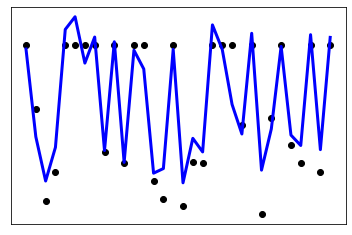

In [10]:
# The coefficients
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

y_test = df_test[TARGET]
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))

# Plot outputs
plt.scatter(df_test[fts].index, y_test,  color='black')
plt.plot(df_test[fts].index, y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [11]:
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor

decision_tree = True

if decision_tree:
    clf = tree.DecisionTreeRegressor()
else:
    clf = RandomForestRegressor() # tree.DecisionTreeRegressor()
clf = clf.fit(df[fts], df[TARGET])

In [12]:
clf_pred = clf.predict(df_test[fts])

In [13]:
import graphviz 

if decision_tree:
    dot_data = tree.export_graphviz(clf, out_file=None) 
    graph = graphviz.Source(dot_data) 
    graph.render("iris") 


In [14]:
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, clf_pred))

Mean squared error: 96370853.94


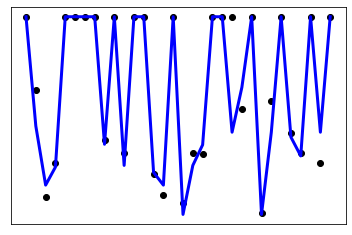

In [15]:
# Plot outputs
plt.scatter(df_test[fts].index, y_test,  color='black')
plt.plot(df_test[fts].index, clf_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [16]:
def mean_absolute_percentage_error(y_pred, y_true):
    return np.average(np.abs(y_pred - y_true) / np.abs(y_true))
    
mean_absolute_percentage_error(clf_pred, y_test)

0.06590578355194746

In [17]:
mean_absolute_percentage_error(y_pred, y_test)

0.14016686239601073

Feature: 0, --disable-avs, Score: 0.00057
Feature: 1, --disable-swscale, Score: 0.00003
Feature: 2, --disable-lavf, Score: 0.00000
Feature: 3, --disable-ffms, Score: 0.00046
Feature: 4, --disable-gpac, Score: 0.00034
Feature: 5, --disable-lsmash, Score: 0.05059
Feature: 6, --enable-lto, Score: 0.00018
Feature: 7, --enable-debug, Score: 0.00745
Feature: 8, --enable-gprof, Score: 0.00010
Feature: 9, --enable-strip, Score: 0.00003
Feature: 10, --enable-pic, Score: 0.00198
Feature: 11, --disable-asm, Score: 0.02685
Feature: 12, --enable-shared, Score: 0.00000
Feature: 13, --enable-static, Score: 0.00000
Feature: 14, --enable-bashcompletion, Score: 0.00341
Feature: 15, --disable-cli, Score: 0.00000
Feature: 16, --disable-bashcompletion, Score: 0.00287
Feature: 17, --disable-opencl, Score: 0.00014
Feature: 18, --disable-gpl, Score: 0.00036
Feature: 19, --disable-thread, Score: 0.00000
Feature: 20, --disable-win32thread, Score: 0.00053
Feature: 21, --disable-interlaced, Score: 0.00002
Feature

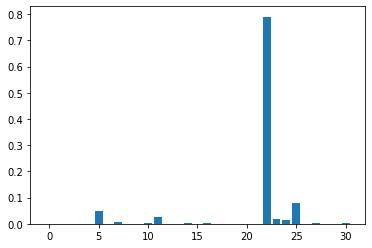

In [18]:
importance = clf.feature_importances_
for i, v in enumerate(importance):
    print('Feature: %d, %s, Score: %.5f' % (i, df.columns[i], v))
plt.bar([x for x in range(len(importance))], importance)
plt.show()